In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as wb
import numpy as np
import seaborn as sns

# Parte 1

In [29]:
# Llamado de librerias
%matplotlib inline

# Datos
import numpy as np
import pandas as pd
import yfinance as yf 
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from pandas_datareader import data as pdr
from operator import index

# Gráficas
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import (WeekdayLocator, MONDAY)
from IPython.display import display
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.dates as mpl_dates

# plt.style.use('dark_background')


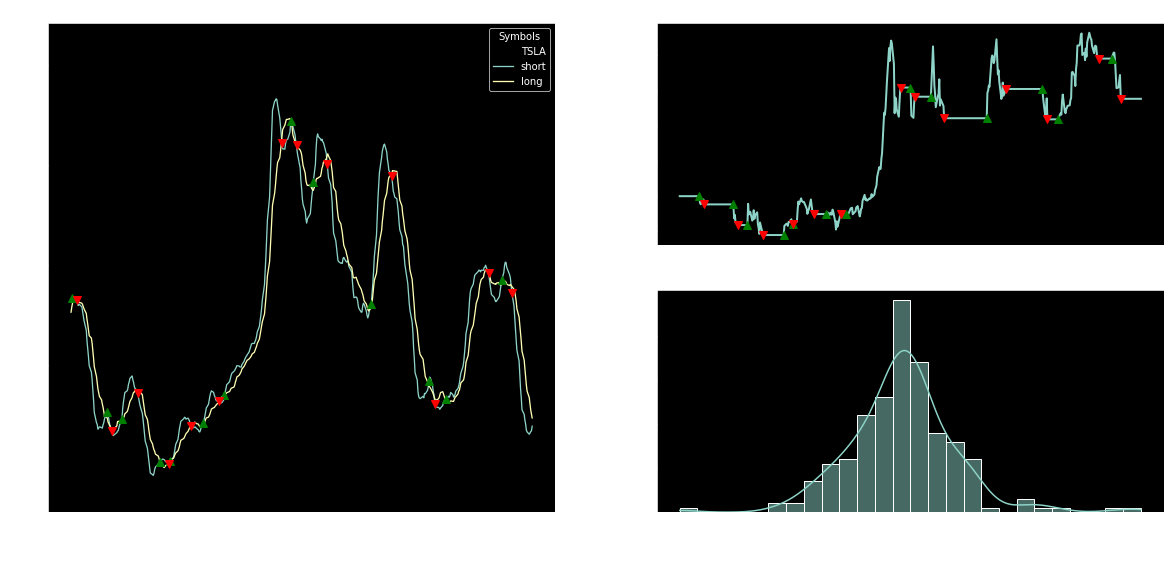

In [30]:
assets = ['TSLA']
data = wb.DataReader(assets, 'yahoo', '2021-1-1')['Adj Close']

short_window = 10
long_window = 20

signal = pd.DataFrame(index=data.index)

signal['short']= data.rolling(short_window).mean()
signal['long']= data.rolling(long_window).mean()
signal['short'] = signal['short'].iloc[long_window:]

signal['signals'] = np.where(signal['short'] > signal['long'], 1, 0)

signal['positions'] = signal['signals'].diff()

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, ylabel=assets)
ax1.set_title("Estrategia cruce de medias con: " + str(assets))
data.iloc[long_window:].plot(ax=ax1, color='k', lw=1.9)
signal[['short', 'long']].plot(ax=ax1, lw=1.3)
ax1.plot(signal['short'][signal['positions'] == 1], '^', markersize=8, color='g')
ax1.plot(signal['short'][signal['positions'] == -1], 'v', markersize=8, color='r')


capital = int(100000)
stocks = int(300)

positions = pd.DataFrame(index=signal.index)
positions['TSLA'] = stocks*signal['signals']
portfolio = positions.multiply(data)

pos_diff = positions.diff()

portfolio['Cartera'] = portfolio
portfolio['Cash'] = capital - (pos_diff.multiply(data).cumsum())
portfolio['total'] = portfolio['Cash'] + portfolio['Cartera']
portfolio['Returns'] = portfolio['total'].pct_change()[1:]

portfolio['Returns'] = portfolio['Returns'][portfolio['Returns'] != 0]

ax2= fig.add_subplot(222, ylabel='Valor de la cartera')
portfolio['total'].plot(ax=ax2, lw=2., label="Total de la cartera")
ax2.plot(portfolio['total'][signal['positions'] == 1], '^', markersize = 8, color='g')
ax2.plot(portfolio['total'][signal['positions'] == -1], 'v', markersize = 8, color='r')

ax3= fig.add_subplot(224)
sns.histplot(portfolio['Returns'], kde=True, ax=ax3)
plt.show()

# Parte 2

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

In [3]:
# Inputs
Asset = 'TSLA'
S_date = '2021-07-01'                                                                           #Formato yy/mm/dd
E_date = '2022-11-30'                                                                           #Formato yy/mm/dd
df = yf.download(tickers = Asset, start = S_date, end = E_date, group_by = 'ticker', period = '1d')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,227.973328,229.330002,224.266663,225.973328,225.973328,55903500
2021-07-02,226.326660,233.333328,224.419998,226.300003,226.300003,81163500
2021-07-06,227.236664,228.000000,217.133331,219.860001,219.860001,69853500
2021-07-07,221.423340,221.899994,212.773331,214.883331,214.883331,56376000
2021-07-08,209.456665,218.143326,206.820007,217.603333,217.603333,68319900


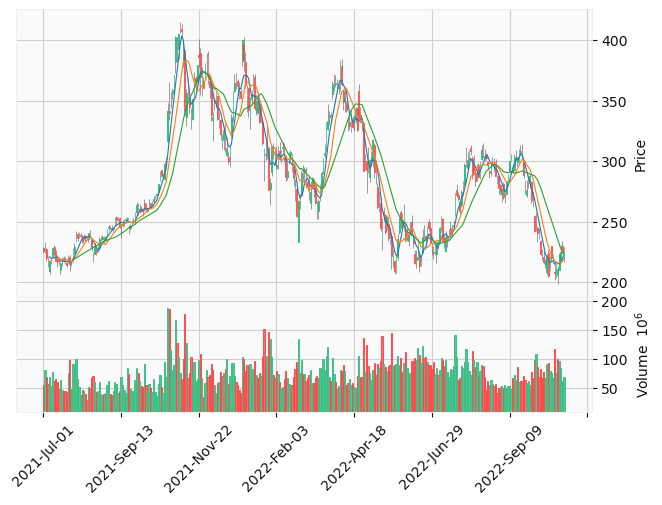

In [18]:
# plot candlestick chart
mpf.plot(df, type='candle', mav=(5, 10, 20), volume = True, style = 'yahoo')

In [1]:

# Add MACD as subplot
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd

macd = MACD(df, 12, 26, 9)
macd_plot  = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
]

mpf.plot(df, type='candlestick', volume=True, addplot=macd_plot,show_nontrading=True, style='yahoo')

NameError: name 'df' is not defined